In [31]:
#Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import calmap
from ydata_profiling import ProfileReport
#created by puteriirene@gmail.com

Introduction:

Grab Holdings Inc. is a Singaporean multinational technology company headquartered in One-North, Singapore. It is the developer of a super-app for ride-hailing, food delivery and digital payments services on mobile devices that operates in Singapore, Malaysia, Cambodia, Indonesia, Myanmar, the Philippines, Thailand and Vietnam.

Grab website: https://www.grab.com/sg/

Dataset dates: 1 December 2021 - 13 May 2024


Task 1: Initial Data Exploration

Key Questions:
1.Does the data contain columns like Date, Open, High, Low, Close, Volume?
2.Are there any missing or incorrect values?


In [32]:
df=pd.read_csv('GRAB.csv')

In [33]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [34]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-12-01,13.595,13.63,11.01,11.01,11.01,8964400
1,2021-12-02,13.055,13.29,8.13,8.75,8.75,35751200
2,2021-12-03,9.160,9.52,8.45,8.99,8.99,29667200
3,2021-12-06,8.950,9.10,8.23,9.00,9.00,25416000
4,2021-12-07,9.055,9.06,8.32,8.85,8.85,25775900


In [35]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
610,2024-05-07,3.50,3.510,3.47,3.50,3.50,14917400
611,2024-05-08,3.45,3.510,3.45,3.50,3.50,16323500
612,2024-05-09,3.48,3.565,3.48,3.55,3.55,21456800
613,2024-05-10,3.59,3.590,3.50,3.50,3.50,20061100
614,2024-05-13,3.51,3.560,3.50,3.54,3.54,21822400


In [36]:
df.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [37]:
df['Date']=pd.to_datetime(df['Date'])

In [18]:
df.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume                int64
dtype: object

In [41]:
df.sort_values('Date', inplace=True)

In [44]:
df.set_index('Date', inplace=True)

In [52]:
df.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

Task 2: Visualize Trends

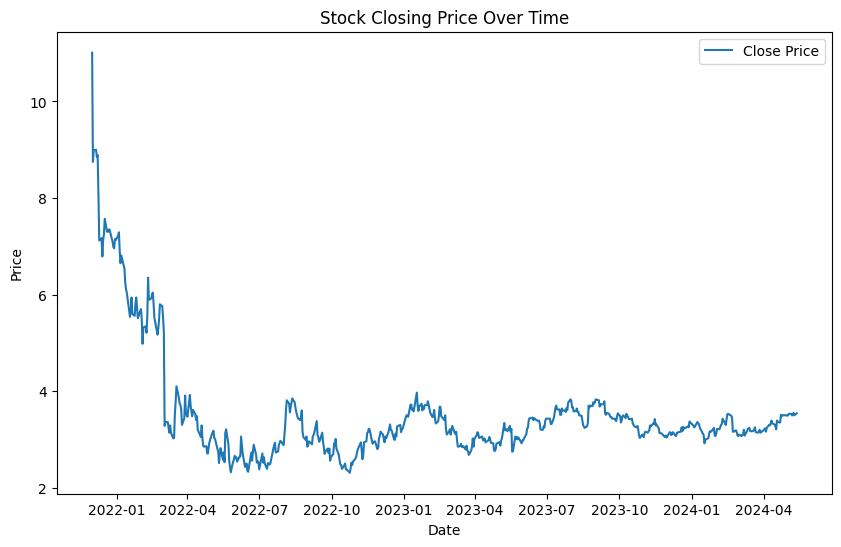

In [48]:
#Stock price over time
plt.figure(figsize=(10,6))
plt.plot(df.index, df['Close'], label='Close Price')
plt.title('Stock Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

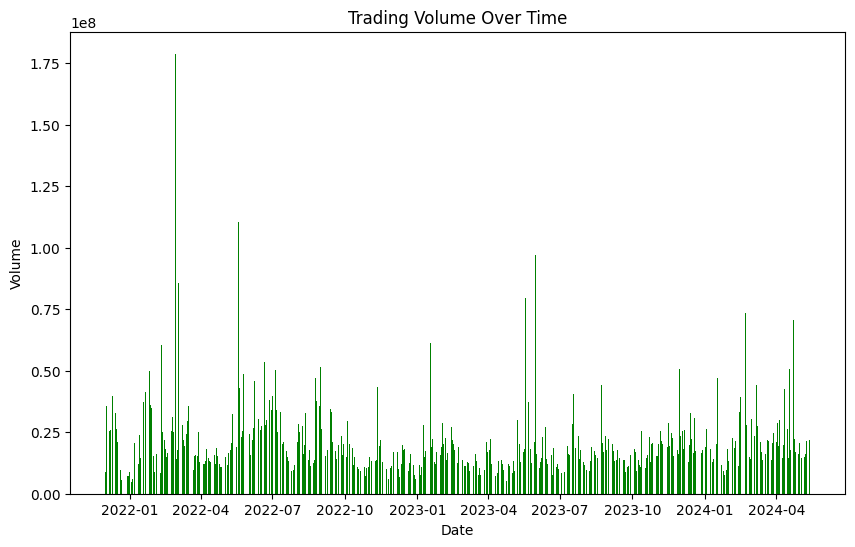

In [49]:
#Volume trends
plt.figure(figsize=(10,6))
plt.bar(df.index, df['Volume'], label='Volume', color='green')
plt.title('Trading Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.show()

Task 3. Statistical Summary

In [53]:
df[['Open', 'High', 'Low', 'Close', 'Volume']].describe()

,Open,High,Low,Close,Volume
count,615.000000,615.000000,615.000000,615.000000,6.150000e+02
mean,3.536870,3.633802,3.421117,3.521382,2.077360e+07
std,1.218812,1.242598,1.084514,1.136937,1.496897e+07
min,2.330000,2.330000,2.190000,2.310000,4.354100e+06
25%,3.000000,3.094500,2.920000,3.000000,1.291775e+07
50%,3.230000,3.300000,3.160000,3.230000,1.717930e+07
75%,3.540000,3.627500,3.470000,3.525000,2.431045e+07
max,13.595000,13.630000,11.010000,11.010000,1.788307e+08


Task 4: Analyze Daily Returns

In [55]:
#Compute daily returns
df['Daily Return']=df['Close'].pct_change()

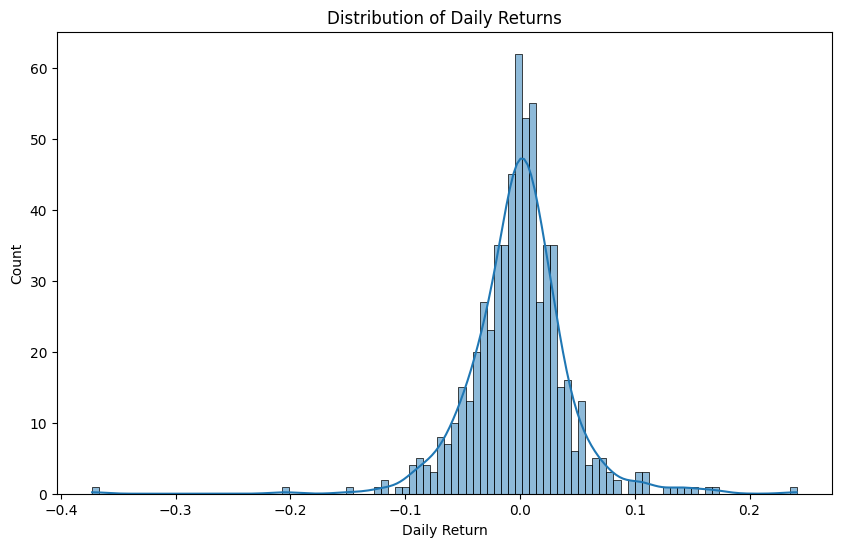

In [56]:
#Plot daily returns
plt.figure(figsize=(10,6))
sns.histplot(df['Daily Return'].dropna(), bins=100, kde=True)
plt.title('Distribution of Daily Returns')
plt.xlabel('Daily Return')
plt.show()

Task 5: Analyze Moving Averages

In [59]:
#Compute moving averages
df['MA50']=df['Close'].rolling(window=50).mean()
df['MA200']=df['Close'].rolling(window=200).mean()

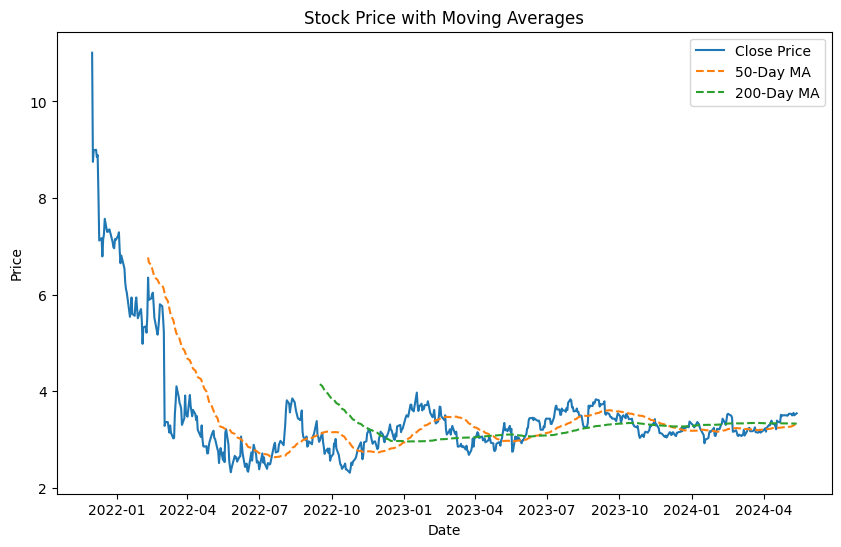

In [61]:
#Plot moving averages
plt.figure(figsize=(10,6))
plt.plot(df.index, df['Close'], label='Close Price')
plt.plot(df.index, df['MA50'], label='50-Day MA', linestyle='--')
plt.plot(df.index, df['MA200'], label='200-Day MA', linestyle='--')
plt.title('Stock Price with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

Task 6: Correlation Analysis

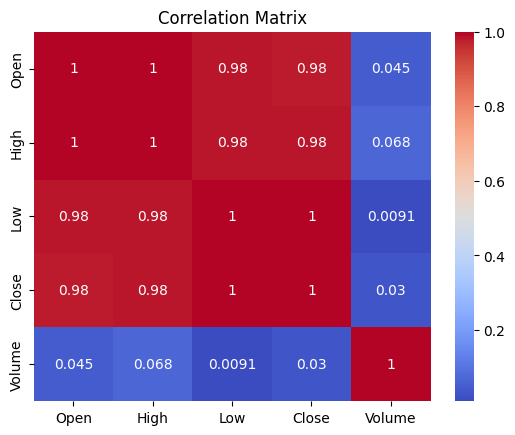

In [62]:
#Correlation matrix
corr_matrix=df[['Open', 'High', 'Low', 'Close', 'Volume']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

Task 7: Volatility Analysis

In [63]:
#Calculate rolling volatility
df['Volatility']=df['Daily Return'].rolling(window=30).std()

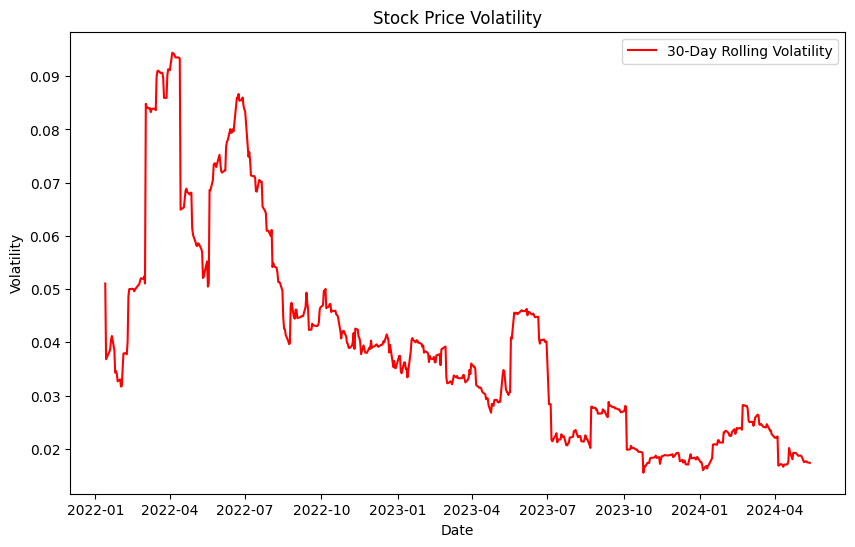

In [65]:
#Plot volatility
plt.figure(figsize=(10,6))
plt.plot(df.index, df['Volatility'], label='30-Day Rolling Volatility', color='red')
plt.title('Stock Price Volatility')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend()
plt.show()

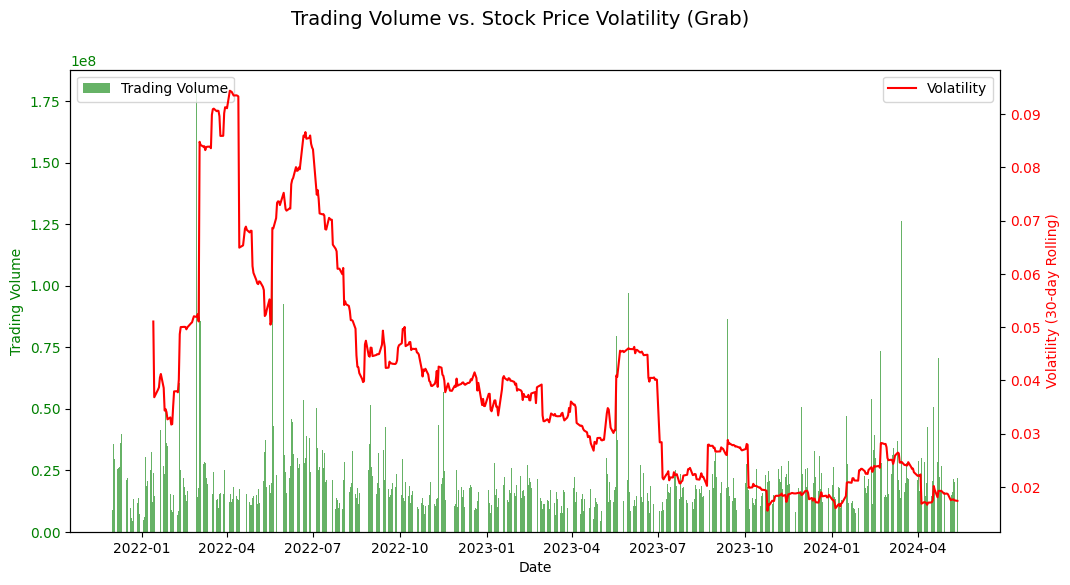

In [88]:
#Plot trading volume and volatility
fig, ax1=plt.subplots(figsize=(12,6))

#Plot trading volume on the first y-axis
ax1.bar(df.index, df['Volume'], color='green', label='Trading Volume', alpha=0.6)
ax1.set_ylabel('Trading Volume', color='green')
ax1.tick_params(axis='y', labelcolor='green')
ax1.set_xlabel('Date')

#Plot volatility on the second y-axis
ax2 = ax1.twinx()
ax2.plot(df.index, df['Volatility'], color='red', label='Volatility')
ax2.set_ylabel('Volatility (30-day Rolling)', color='red')
ax2.tick_params(axis='y', labelcolor='red')

#Add title and legends
fig.suptitle('Trading Volume vs. Stock Price Volatility (Grab)', fontsize=14)
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.show()

In [ ]:
Task 8: Seasonal / Trend Analysis

In [76]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [82]:
#Decompose closing price
decomposition=seasonal_decompose(df['Close'], model='multiplicative', period=30)

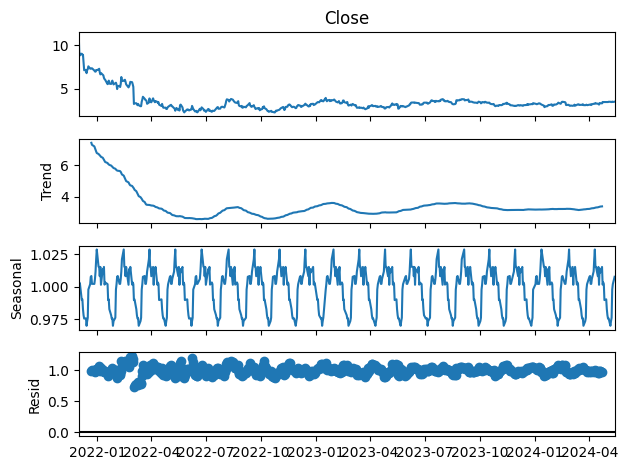

In [83]:
#Plot components
decomposition.plot()
plt.show()

Key Insights:
1. Trends: It appears there was a decline in the stock price early in the timeline, followed by a relatively stable or slightly increasing trend
2. Volatility: Peaks in trading volume often correlate with spikes in volatility. Large price swings (volatility) might be driven by high- volume trading sessions, often triggered by news or earnings announcements.
3. Correlations: The different price points of the stock are highly interconnected, however trading volume doesn't seem to be a strong predictor of price movements in this case.
4. Seasonality: Repetitive patterns which occur every 30-day, suggesting consistent price behavior over a 30-day cycle
